# Time series
# RPI:Weights (parts per 1000) - beer off sales

In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#import dataset
df = pd.read_csv("D:/projects/patrick/Time series/beer.csv")

In [3]:
#checking the data
print(df.head(10))

               Title RPI:Weights (parts per 1000) - beer off sales
0               CDID                                          CZWX
1  Source dataset ID                                          MM23
2            PreUnit                                           NaN
3               Unit                                Parts per 1000
4       Release date                                    15-02-2023
5       Next release                                 22 March 2023
6    Important notes                                           NaN
7               1987                                             5
8               1988                                             5
9               1989                                             6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Title                                          43 non-null     object
 1   RPI:Weights (parts per 1000) - beer off sales  41 non-null     object
dtypes: object(2)
memory usage: 816.0+ bytes


In [5]:
# clean
df.dropna(inplace = True)

In [6]:
#checking the data
print(df.head(10))

                Title RPI:Weights (parts per 1000) - beer off sales
0                CDID                                          CZWX
1   Source dataset ID                                          MM23
3                Unit                                Parts per 1000
4        Release date                                    15-02-2023
5        Next release                                 22 March 2023
7                1987                                             5
8                1988                                             5
9                1989                                             6
10               1990                                             6
11               1991                                             6


In [7]:
df.drop([0,1,3,4,5], axis = 0, inplace = True)

In [8]:
#checking the data after removing unnecessary rows
print(df.head())

   Title RPI:Weights (parts per 1000) - beer off sales
7   1987                                             5
8   1988                                             5
9   1989                                             6
10  1990                                             6
11  1991                                             6


In [9]:
#convert to datetime
df['Title'] = pd.to_datetime(df['Title'], format='%Y')
print(df.head())

        Title RPI:Weights (parts per 1000) - beer off sales
7  1987-01-01                                             5
8  1988-01-01                                             5
9  1989-01-01                                             6
10 1990-01-01                                             6
11 1991-01-01                                             6


In [10]:
#convert to integer
df['RPI:Weights (parts per 1000) - beer off sales'] = df['RPI:Weights (parts per 1000) - beer off sales'].astype(str).astype(int)
print(df.head())

        Title  RPI:Weights (parts per 1000) - beer off sales
7  1987-01-01                                              5
8  1988-01-01                                              5
9  1989-01-01                                              6
10 1990-01-01                                              6
11 1991-01-01                                              6


In [11]:
df.dtypes

Title                                            datetime64[ns]
RPI:Weights (parts per 1000) - beer off sales             int32
dtype: object

In [12]:
#setting the year 'Title' as index
df = df.set_index("Title")

In [13]:
df.head()

,RPI:Weights (parts per 1000) - beer off sales
Title,
1987-01-01,5
1988-01-01,5
1989-01-01,6
1990-01-01,6
1991-01-01,6


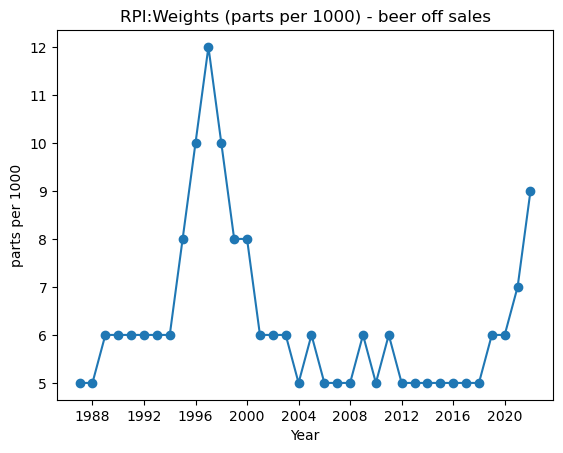

In [14]:
#plotting the time series
plt.plot(df["RPI:Weights (parts per 1000) - beer off sales"], marker = 'o')
#label
plt.title('RPI:Weights (parts per 1000) - beer off sales')
plt.xlabel('Year')
plt.ylabel('parts per 1000')
plt.show()

# calculating Rolling average

In [15]:
df['MA2'] = df['RPI:Weights (parts per 1000) - beer off sales'].rolling(window=2).mean()
df['MA4'] = df['RPI:Weights (parts per 1000) - beer off sales'].rolling(window=4).mean()
df['MA6'] = df['RPI:Weights (parts per 1000) - beer off sales'].rolling(window=6).mean()

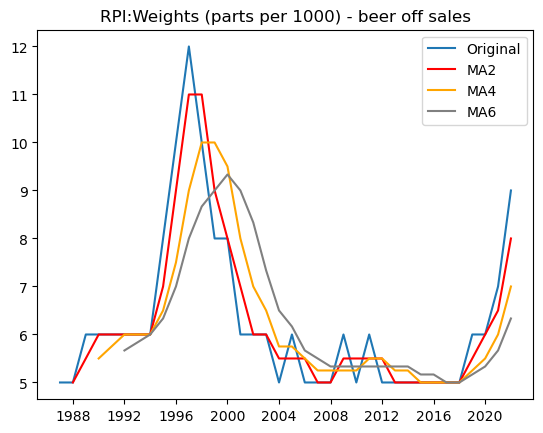

In [16]:
# Plotting
plt.title('RPI:Weights (parts per 1000) - beer off sales')
plt.plot(df['RPI:Weights (parts per 1000) - beer off sales'], label='Original')
plt.plot(df['MA2'], color='red', label='MA2')
plt.plot(df['MA4'], color='orange', label='MA4')
plt.plot(df['MA6'], color='gray', label='MA6')
plt.legend();